---
comments: true
layout: post
title: Data Structure Write Up
type: hacks
courses: { compsci: {week: 26} }
---

# Collections

- Blog Python API code and use of List and Dictionaries.

- This code initializes a database of our own for storing the images.

In [ ]:

def initializeDatabase():
    global engine, Session, session

    engine = create_engine('sqlite:///database2.db')
    Session = sessionmaker(bind=engine)
    session = Session()

    Base.metadata.create_all(engine)

def clearDatabase():
    initializeDatabase()
    session.query(Images).delete()
    session.commit()
    session.close()

class Images(Base):
    __tablename__ = 'images'
    imageName = Column(String, primary_key=True, nullable=False, unique=False)  # Added nullable=False for primary key
    imageFunc = Column(String, nullable=False, unique=False)  # Added nullable=False for non-nullable columns
    imageBase64 = Column(String, nullable=False, unique=False)

def createImage(name, func, image):
    initializeDatabase()
    newImage = Images(imageName=name, imageFunc=func, imageBase64=image)
    session.add(newImage)
    session.commit()


- From VSCode using SQLite3 Editor, show your unique collection/table in database, display rows and columns in the table of the SQLite database.
    - This is the data table of stored memes based on if the creator selected the store option
![Image1](![Screenshot 2024-04-17 at 3.31.23 PM.png](<attachment:Screenshot 2024-04-17 at 3.31.23 PM.png>))

- From VSCode model, show your unique code that was created to initialize table and create test data.
    -   Uses two normal and 1 admin account as instructed
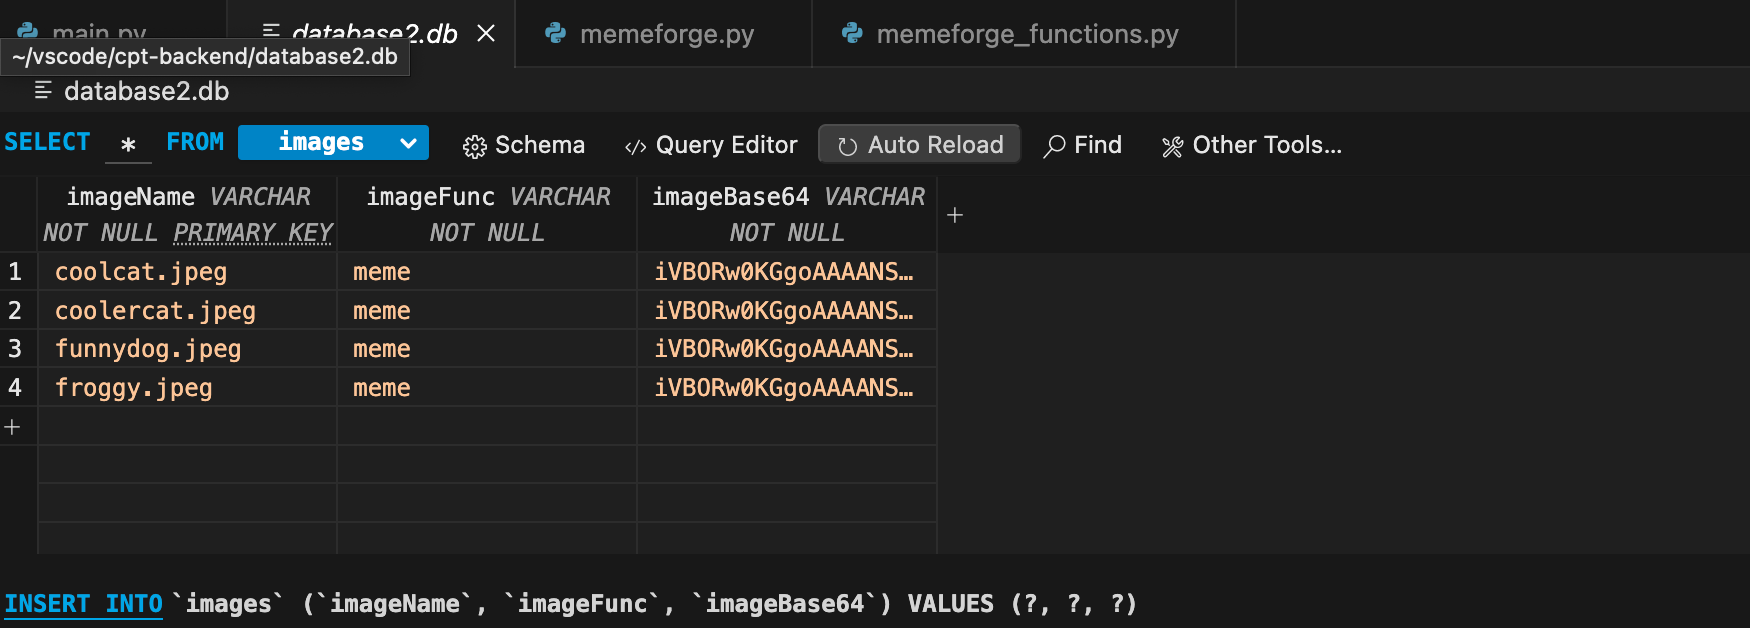

In [ ]:
def initUsers():
    with app.app_context():
        """Create database and tables"""
        db.create_all()
        """Tester data for table"""
        u1 = User(name='Thomas Edison', uid='toby', password='123toby', type="standard")
        u2 = User(name='Imaad Muzaffer', uid='imaad', password='123imaad', type="standard")
        u3 = User(name='Admin Account', uid='admin', type="admin")
        users = [u1, u2, u3]

        """Builds sample user/note(s) data"""
        for user in users:
            try:
                '''add a few 1 to 4 notes per user'''
                '''add user/post data to table'''
                user.create()
            except IntegrityError:
                '''fails with bad or duplicate data'''
                db.session.remove()
                print(f"Records exist, duplicate email, or error: {user.uid}")

- In VSCode using Debugger, show a list as extracted from database as Python objects.
    - This shows the user data object being extracted in the debugger after a postman request
![Image1](image-10.png)

- In VSCode use Debugger and list, show two distinct example examples of dictionaries, show Keys/Values using debugger.
    - The data for the user is shown under here where the purple text is the key and the value is next to it
    - When a user is created, it shows the data under the user with the purple text being the key and the value is next to it
    ![Image1](image-10.png)

# APIS and JSON

Blog Python API code and use of Postman to request and respond with JSON.

- In VSCode, show Python API code definition for request and response using GET, POST, UPDATE methods. Discuss algorithmic condition used to direct request to appropriate Python method based on request method.
    - The API has many CRUD definitions for GET POST and UPDATE responses for modifiying objects
    - A resource needs to be defined in order to create enpoints
    - This code is defining the end point for the user api that allows for GET POST and PUT responses
    

In [ ]:
    # building RESTapi endpoint
    api.add_resource(_CRUD, '/')
    api.add_resource(_Security, '/authenticate')

- In VSCode, show algorithmic conditions used to validate data on a POST condition.
    - Algorithmic requirements guarantee the validity of input data. The condition integrated into the user code validates the password's security by cheking its minimum length and confirming the presence of both a name and a password.
    

In [ ]:
            # validate name
            name = body.get('name')
            if name is None or len(name) < 2:
                return {'message': f'Name is missing, or is less than 2 characters'}, 400
            # validate uid
            uid = body.get('uid')
            if uid is None or len(uid) < 2:
                return {'message': f'User ID is missing, or is less than 2 characters'}, 400

- In Postman, show URL request and Body requirements for GET, POST, and UPDATE methods.
- In Postman, show the JSON response data for 200 success conditions on GET, POST, and UPDATE methods.
![Image1](image-11.png)
![Image1](image-12.png)
![Image1](image-14.png)

- In Postman, show the JSON response for error for 400 when missing body on a POST request.
    - When the body is missing, there is no JSON data to send which is the point of a POST
![Image1](image-13.png)

- In Postman, show the JSON response for error for 404 when providing an unknown user ID to a UPDATE request.
    - This is a 400 error due to the user not being found
![Image1](image-15.png)

- This code decodes the JWT and extracts user ID
- An application for this is the elimincation of using uid



In [ ]:
user = jwt.decode(token, current_app.config["SECRET_KEY"], algorithms=["HS256"])['_uid']

# Frontend

- In Chrome inspect, show response of JSON objects from fetch of GET, POST, and UPDATE methods.
    - This POST request sends the body of data for the login to the backend in JSON format
![image.png](image-16.png)

- In the Chrome browser, show a demo (GET) of obtaining an Array of JSON objects that are formatted into the browsers screen.
    - This formats the base64 data for all the images in the database into a gallery table that lets users download the images
![image.png](image-17.png)

- In JavaScript code, describe fetch and method that obtained the Array of JSON objects.
    - The apiUrl constant holds the URL of the API endpoint
    - The images variable is an array that will later hold the fetched data
    - The fetchDatabase function is where the actual fetching of data happens. 
    - It uses the Fetch API to make a network request to the API endpoint specified in apiUrl
    - The fetch function returns a Promise that resolves to the Response object representing the response to the request. This response object is then converted to JSON using the json method
    - The then method is used to specify what should happen once the Promise is resolved. In this case, it's another Promise that checks the status of the response

In [ ]:
const apiUrl = "https://memeforge.stu.nighthawkcodingsociety.com/api/memeforge/get_database";
        let images = [];
        function fetchDatabase() {
            fetch(apiUrl)
                .then(response => response.json())
                .then(response => {
                    if (response.status === 401) {
                        window.location.href = '{{site.baseurl}}/login';
                        return;
                    }
                    if (response.status === 403) {
                        window.location.href = '{{site.baseurl}}/403';
                        return;
                    }
                    images = JSON.parse(response).reverse();
                    displayImages(images);
                });
        }

- In JavaScript code, show code that performs iteration and formatting of data into HTML.
    - The function first selects the gallery element on the webpage using document.querySelector('.gallery')
    - Rhe function iterates over the images array using forEach. For each image object, it creates a new div element to serve as a container for the gallery item (galleryItemContainer)
    - It also creates another div for the gallery item itself (galleryItem), an img element for the image, and a button for downloading the image.
    - The src attribute of the img element is set to the base64 encoded string of the image data, and the alt attribute is set to the name of the image. 

In [ ]:
function displayImages(images) {
    const gallery = document.querySelector('.gallery');
    gallery.innerHTML = '';
    images.forEach((image, index) => {
        const galleryItemContainer = document.createElement('div');
        galleryItemContainer.className = 'gallery-item-container';
        const galleryItem = document.createElement('div');
        galleryItem.className = 'gallery-item';
        const img = document.createElement('img');
        img.src = 'data:image/jpeg;base64,' + image.image;
        img.alt = image.name;
        img.addEventListener('click', () => {
            openModal(image.image);
        });
        const button = document.createElement('button');
        button.textContent = 'Download';
        button.addEventListener('click', () => {
            downloadImage(image.image, image.name);
        });
        galleryItem.appendChild(img);
        galleryItem.appendChild(button);
        galleryItemContainer.appendChild(galleryItem);
        gallery.appendChild(galleryItemContainer);
    });
}

- In the Chrome browser, show a demo (POST or UPDATE) gathering and sending input and receiving a response that show update. Repeat this demo showing both success and failure.
    - This turns the image into base64 data where it is sent to the backend with the top and bottom text
    - The backend used PIL to add the text onto the image and turn it back into base64
    - The updated image is sent over to the frontend where it is then displayed
    ![image.png](image-18.png)

- In JavaScript code, show and describe code that handles success. Describe how code shows success to the user in the Chrome Browser screen.
    - In the case that the backend successfully adds the text to the image, the frontend will display a success message and the image will be displayed
    - The user will additionally be able to download the image on to their local machine

- In JavaScript code, show and describe code that handles failure. Describe how the code shows failure to the user in the Chrome Browser screen. (same code)
    - If something goes wrong with the api, the user is alerted with what the error is and possiblt what is causing it
    - This is helpful for checking if the backend is working or not vs if the image file is in the database already

In [ ]:
fetch(url, image_options)
                    .then(response => {
                        if (response.status !== 200) {
                            error('Api error: ' + response.status);
                            return;
                        }
                        response.json().then(data => {
                            const memeImage = new Image();
                            memeImage.src = 'data:image/' + fileExtension + ';base64,' + data['base64image'];
    
                            memeImage.style.maxHeight = '100%';
    
                            uploadedImage.src = memeImage.src;
                            uploadedImage.style.display = 'block';
    
                            memeImage.onload = function () {
                                const parent = document.querySelector('.bottom-half');
                                const ratio = parent.clientWidth / memeImage.width;
    
                                if (ratio < 1) {
                                    const maxHeight = ratio * memeImage.height;
                                    parent.style.height = (maxHeight + 175) + 'px';
                                } else {
                                    parent.style.height = (memeImage.height + 175) + 'px';
                                }
                            };
                        });
                    });
    function handleDownloadClick() {
        const uploadedImage = document.getElementById('uploadedImage');
        const memeImage = new Image();
        memeImage.src = uploadedImage.src;

        if (uploadedImage.width == 0) {
            alert('Please upload an image before trying to download');
            return;
        }
        const downloadLink = document.createElement('a');
        downloadLink.href = memeImage.src;
        downloadLink.download = uploadedImageName.split('.')[0] + "_meme." + uploadedImageName.split('.')[1];
        downloadLink.style.display = 'none';

        document.body.appendChild(downloadLink);
        downloadLink.click();

        document.body.removeChild(downloadLink);

    }
    const downloadButton = document.getElementById('downloadButton');
    downloadButton.addEventListener('click', handleDownloadClick);


<script src="https://utteranc.es/client.js"
        repo="imaad08/student2"
        issue-term="pathname"
        theme="github-dark"
        crossorigin="anonymous"
        async>
</script>